In [37]:
import os
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
import requests

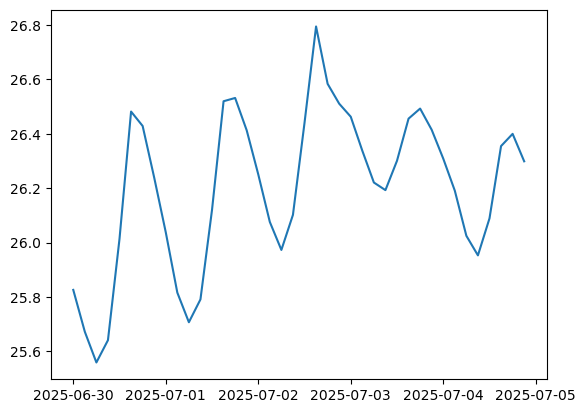

In [39]:
t = []
d = []

url = "http://localhost:8000/simulations/point/mitgcm/zurich/202506300000/202507100000/1/47.22/8.72?variables=temperature"
response = requests.get(url)
if response.status_code == 200:
    data = response.json()
    time = [datetime.fromisoformat(t) for t in data["time"]]
    t = t + time
    d = d + list(data["variables"]["temperature"]["data"])
    plt.plot(time, data["variables"]["temperature"]["data"])
    plt.show()

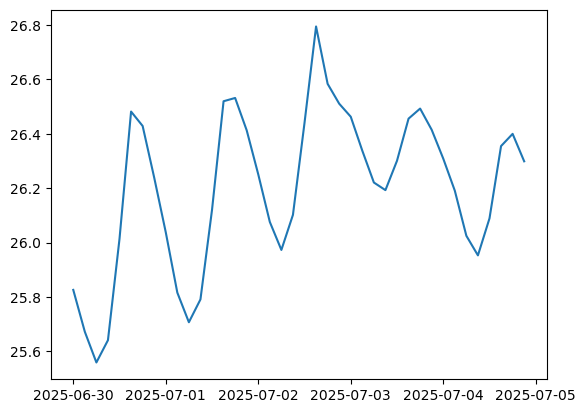

In [35]:
plt.plot(t, d)
plt.show()

In [36]:
tt = np.array(t)
tt[~np.isnan(np.array(d, dtype=float))][-1]

datetime.datetime(2025, 7, 4, 21, 0, tzinfo=datetime.timezone.utc)

In [ ]:
import numpy as np
import os

def check_pickup_file(filename, nx, ny, nz=None, num_fields=None, dtype='>f4'):
    """
    Check MITgcm pickup file for NaNs, Infs, and extreme values.

    Parameters:
    - filename: str, path to pickup file (e.g., pickup.data)
    - nx, ny: horizontal grid dimensions
    - nz: vertical levels (optional)
    - num_fields: number of fields (e.g., THETA, UVEL, etc.), optional
    - dtype: data type, usually '>f4' (big-endian 32-bit float)
    """

    if not os.path.isfile(filename):
        raise FileNotFoundError(f"File not found: {filename}")

    print(f"Reading: {filename}")
    raw = np.fromfile(filename, dtype=dtype)

    print(f"Total elements: {raw.size}")

    # Basic checks
    print("Checking for NaNs:", np.isnan(raw).any())
    print("Checking for Infs:", np.isinf(raw).any())
    print(f"Min value: {np.nanmin(raw)}")
    print(f"Max value: {np.nanmax(raw)}")

    # Try to reshape if dimensions are given
    if nz and num_fields:
        expected_size = nx * ny * nz * num_fields
        if raw.size != expected_size:
            print(f"WARNING: Expected size {expected_size} doesn't match actual size {raw.size}")
        else:
            raw = raw.reshape((num_fields, nz, ny, nx))
            print(f"Data reshaped to: {raw.shape} (fields, z, y, x)")

    return raw


filename = 'pickup.data'  # or pickup_seaice.data, etc.
nx, ny, nz = 90, 40, 15   # replace with your domain size
num_fields = 8            # e.g., THETA, SALT, U, V, Eta, etc.

check_pickup_file(filename, nx, ny, nz, num_fields)